In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Here we are going to create one of the state of the art RNN architecture that is LSTMs
# LSTMs - Long Short Term Memory RNN with long memory
# Importing the training set
Training_set = pd.read_csv('Google_Stock_Price_Train.csv')
print(Training_set.head())
Training_set = Training_set.iloc[:,1:2].values
print(Training_set)
# Here what we are doing is that extracting only the open prices from dataset and converting this to an array using
# .values method of the pandas dataframe and here we are using iloc method of pandas dataframe to access the index
# Therefore we now have the open prices of the google stock prices for 5Yrs

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
[[ 325.25]
 [ 331.27]
 [ 329.83]
 ..., 
 [ 793.7 ]
 [ 783.33]
 [ 782.75]]


**Feature Scaling is compulsory in Deep Learning**

In [3]:
# Now we are going to apply feature scaling in our training set
from sklearn.preprocessing import MinMaxScaler
# Now what we do is, we will create the object of this class MinMaxScaler and then use fit transform method to apply
# feature Scaling to our dataset
sc = MinMaxScaler()
Training_set = sc.fit_transform(Training_set)
print(Training_set)

# So here we have applied normalization because instructor told he got better result with normalisation 
# and here in MinMaxScaler we could specify the range of normalisation
# and here we have used fit_transform because this fit the object in the training set and as well apply the transform
# to do normalisation

[[ 0.08581368]
 [ 0.09701243]
 [ 0.09433366]
 ..., 
 [ 0.95725128]
 [ 0.93796041]
 [ 0.93688146]]


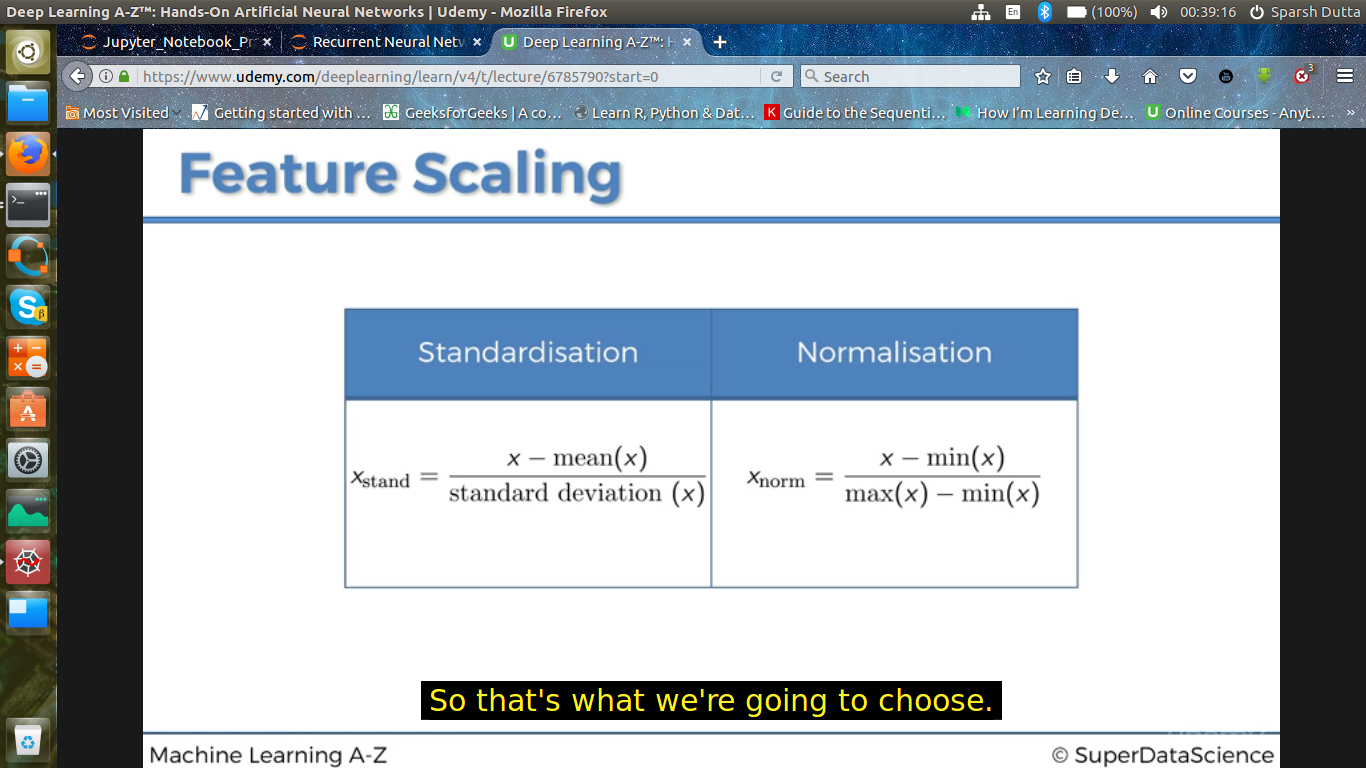

In [4]:
# Now we have the training set with us but what is X_train and Y_train
# So the answer is pretty simple as Y_train will be one delayed part of the training set
print(Training_set.shape)
X_train = Training_set[0:1257]
Y_train = Training_set[1:1258]

(1258, 1)


**RESHAPING**
Here we will learn something new

Input shapes

3D tensor with shape (batch_size, timesteps, input_dim), (Optional) 2D tensors with shape (batch_size, output_dim).

Here batch_size = no of examples, timesteps = 1 and input_dims = no of features

In [5]:
# As we can see that our X_train has shape = (1257, 1) which mean 1257 observation and 1 feature in 2 Dimensions
# Therefore we want to change the dimension of the X_train and make it into 3 Dimensions, so inorder to do this we need
# reshape method of numpy
# But why are we creating and extra dimension?
# Because our input is x(t) and output is x(t+1) therfore when subtracting we get a timestep of 1 therfore we need to take
# this into account
X_train = np.reshape(X_train, (1257, 1, 1))


Now we will start building our LSTM model using keras library

In [6]:
# importing keras packages
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
# Initializing the RNN LSTM model
model = Sequential()

In [8]:
# Now adding the Input Layer and the LSTM layer
# Here units represents the number of memory units, we set it = 4 because we get it as a result of parameter tuning and
# and and in the input_shape first argument is the value of timesteps you can set it to 1 or set it to none to take any
# value and the next argument is no of features and here we have only 1 feature that is stock price at time tb
model.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))

In [9]:
# Now we just need to add the output layer using the dense function
model.add(Dense(units=1))

In [10]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


ML Experts recommend using RMSprop optimizer for RNN but it requires more memory than adam optimizer and we have tested
that they preety much give the same result, but always in general use the RMSprop optimizer 

Here we are using mse which is the one used for regression problem

In [11]:
# Now fitting the model to our trainning set
model.fit(X_train, Y_train, batch_size= 32, epochs=200)

Epoch 1/200
1257/1257 [==============================] - 0s - loss: 0.5805 - acc: 7.9554e-04     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 0.4496 - acc: 7.9554e-04     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 0.3465 - acc: 7.9554e-04     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 0.2670 - acc: 7.9554e-04    
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 0.2065 - acc: 7.9554e-04     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 0.1615 - acc: 7.9554e-04     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 0.1290 - acc: 7.9554e-04     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 0.1059 - acc: 7.9554e-04     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 0.0899 - acc: 7.9554e-04     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 0.0792 - acc: 7.9554e-04     
Epoch 11/200
1257/12

1257/1257 [==============================] - 0s - loss: 9.0428e-04 - acc: 0.0016       
Epoch 85/200
1257/1257 [==============================] - 0s - loss: 7.9320e-04 - acc: 0.0016     
Epoch 86/200
1257/1257 [==============================] - 0s - loss: 6.9990e-04 - acc: 0.0016        
Epoch 87/200
1257/1257 [==============================] - 0s - loss: 6.2119e-04 - acc: 0.0016        
Epoch 88/200
1257/1257 [==============================] - 0s - loss: 5.5433e-04 - acc: 0.0016       
Epoch 89/200
1257/1257 [==============================] - 0s - loss: 4.9924e-04 - acc: 0.0016       
Epoch 90/200
1257/1257 [==============================] - 0s - loss: 4.5213e-04 - acc: 0.0016        
Epoch 91/200
1257/1257 [==============================] - 0s - loss: 4.1360e-04 - acc: 0.0016        
Epoch 92/200
1257/1257 [==============================] - 0s - loss: 3.8071e-04 - acc: 0.0016        
Epoch 93/200
1257/1257 [==============================] - 0s - loss: 3.5522e-04 - acc: 0.0016       


1257/1257 [==============================] - 0s - loss: 2.4764e-04 - acc: 0.0016       
Epoch 165/200
1257/1257 [==============================] - 0s - loss: 2.4854e-04 - acc: 0.0016        
Epoch 166/200
1257/1257 [==============================] - 0s - loss: 2.4828e-04 - acc: 0.0016        
Epoch 167/200
1257/1257 [==============================] - 0s - loss: 2.4722e-04 - acc: 0.0016         
Epoch 168/200
1257/1257 [==============================] - 0s - loss: 2.4652e-04 - acc: 0.0016         
Epoch 169/200
1257/1257 [==============================] - 0s - loss: 2.4677e-04 - acc: 0.0016         
Epoch 170/200
1257/1257 [==============================] - 0s - loss: 2.4666e-04 - acc: 0.0016        
Epoch 171/200
1257/1257 [==============================] - 0s - loss: 2.5030e-04 - acc: 0.0016       
Epoch 172/200
1257/1257 [==============================] - 0s - loss: 2.4753e-04 - acc: 0.0016     
Epoch 173/200
1257/1257 [==============================] - 0s - loss: 2.4538e-04 - acc: 0

Here we will test our model on our test set and make visualization using matplotlib

In [12]:
# First we load our test set
inputs = pd.read_csv('Google_Stock_Price_Test.csv')
inputs = inputs.iloc[:, 1:2].values
print(inputs)
print(inputs.shape)

[[ 778.81]
 [ 788.36]
 [ 786.08]
 [ 795.26]
 [ 806.4 ]
 [ 807.86]
 [ 805.  ]
 [ 807.14]
 [ 807.48]
 [ 807.08]
 [ 805.81]
 [ 805.12]
 [ 806.91]
 [ 807.25]
 [ 822.3 ]
 [ 829.62]
 [ 837.81]
 [ 834.71]
 [ 814.66]
 [ 796.86]]
(20, 1)


**TESTING**

Now as we have loaded our data we have to make the same transformation and feature scaling as we done in the training set

In [13]:
# here we are just applying feature scaling and reshape on to the test set
test_set = sc.fit_transform(inputs)
test_set = np.reshape(test_set,(20, 1, 1))


In [14]:
# Here we have to inverse transform to understand because the data is feature scaled and transformed so we need to apply
# inverse transform
predictions = model.predict(test_set)
stock_price_predicted = sc.inverse_transform(predictions)
print(stock_price_predicted)
print(stock_price_predicted.shape)

[[ 779.03741455]
 [ 788.33575439]
 [ 786.09265137]
 [ 795.19494629]
 [ 806.40789795]
 [ 807.88238525]
 [ 804.9942627 ]
 [ 807.1552124 ]
 [ 807.49859619]
 [ 807.09460449]
 [ 805.81207275]
 [ 805.11541748]
 [ 806.9229126 ]
 [ 807.26629639]
 [ 822.41693115]
 [ 829.71038818]
 [ 836.35192871]
 [ 834.40130615]
 [ 814.74401855]
 [ 796.79779053]]
(20, 1)


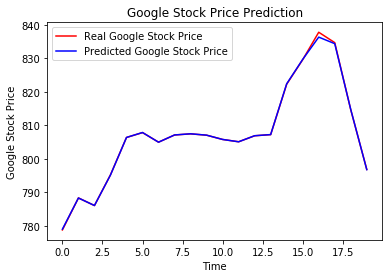

In [16]:
# Now we will be visualizing the results
plt.plot(inputs, color = 'red', label = 'Real Google Stock Price')
plt.plot(stock_price_predicted, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Summary

The reason our predictions are very similar to the inputs is because the network is only learning that the prediction(t) = k * input(t-1), with k a small constant. Therefore it is not relevant.

The whole reason why it is not relevant is in the timestep. With our timestep = 1, we train the network by inputing x(t) and learning x(t+1). So what happens is that the states of the hidden layer are reset, after which we input x(t+1) and learn x(t+2), and so on. Hence, since the states are reset after each time t, the network is not learning anything useful, because it is only taking into account the value we are inputting.

Therefore, to fix this and improve our model, we need to increase the timestep. And that's exactly what we'll do in the next section: Evaluating, Improving and Tuning the RNN.



# Model Evaluation

In [19]:
# Now we will learn how to evaluate any regression model in general
# In order to evaluate a regression model performance we will need to do find out the root mean squared error between
# the original data and predicted data

from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inputs, stock_price_predicted))
print(rmse)

# Now we have to divide rmse by the avg value the real stock prices inorder to get a better understanding
# so if the result is below 1% then it is good predictions
results = (rmse/800)*100
print(results)

0.34004246963905527
0.04250530870488191
